<a href="https://colab.research.google.com/github/yohangumiel/Aulas-PUC-PR/blob/main/Computacao-Natural/Computa%C3%A7%C3%A3o_Natural_V%C3%ADdeo_aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credits to WIRSANKY et al (2020)

WIRSANSKY, Eyal. Hands-on genetic algorithms with Python: applying genetic algorithms to solve real-world deep learning and artificial intelligence problems. Packt Publishing Ltd, 2020.

Original code: https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/blob/master/Chapter03/02-OneMax-short.py



In [ ]:
!pip install deap

In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns



## PARAMETROS DE ENTRADA

In [ ]:

ONE_MAX_LENGTH = 100  # tamanho do vetor a ser otimizado (string com 100 caracteres)

POPULATION_SIZE = 200 # tamanho da população
P_CROSSOVER = 0.9  # probabilidade de um cruzamento
P_MUTATION = 0.1   # probabilidade de uma mutação
MAX_GENERATIONS = 50 # número máximo de gerações (quantidade de ciclos do algoritmo)

RANDOM_SEED = 42 # para replicabilidade
random.seed(RANDOM_SEED)

## FUNÇÕES

https://deap.readthedocs.io/en/master/tutorials/basic/part1.html

Vetor de 100 elementos com valores entre 0 e 1:
 [0, 1, 0, 1, ........., 1]

## Fitness

In [ ]:
# define que teremos uma única função objetivo, maximizando o fitness


creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# exemplo de minimização do fitness
# creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


### Indivíduos

In [ ]:
# o indivíduo é composto de uma lista, herdando do tipo de dado LISTA, tendo um atributo de fitness

creator.create("Individual", list, fitness = creator.FitnessMax)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
toolbox = base.Toolbox()

# são criadas duas funções/comandos na toolbox "zeroOrOne" e "individualCreator"

# operador que retorna 0 ou 1, é usado para criar a população
toolbox.register("zeroOrOne", random.randint, 0, 1) # random.randint(0,1)

# operador que preenche os dados do indivíduo
# initRepeat() - chama a função N vezes e retorna o resultado em um container do tipo container

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

In [ ]:
random.randint(0,1)

1

### População

In [ ]:
# cria o operador da população para gerar a lista de individuos
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)



In [ ]:
toolbox.populationCreator(n=2)

[[0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1],
 [0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0]

In [ ]:
len(toolbox.populationCreator(n=2))

2

In [ ]:
len(toolbox.populationCreator(n=2)[1])

100

### Função de fitness

In [ ]:
# soma todos os valores dos vetores (valor máximo da soma igual a 100)
def oneMaxFitness(individual):
    return sum(individual),

In [ ]:

toolbox.register("evaluate", oneMaxFitness) # indicando a operador para avaliação

### Operadores Genéticos

In [ ]:
# seleção por torneio com tamanho de 3 participantes
toolbox.register("select", tools.selTournament, tournsize=3)

# cruzamento de ponto único
toolbox.register("mate", tools.cxOnePoint)

# mutação por troca de bit, com a probabilidade de mudança de cada atributo sendo definida por indpd
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

# documentação: os nomes usuais para ferramentas evolucionárias são mate(), mutate(), evaluate() e select()


## ALGORITMO

In [ ]:
# cria uma população inicial (geração 0)
population = toolbox.populationCreator(n=POPULATION_SIZE)

# seleciona quais estatísticas necessitamos
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

# roda o algoritmo genético
population, logbook = algorithms.eaSimple(population, toolbox, cxpb= P_CROSSOVER, mutpb= P_MUTATION, ngen= MAX_GENERATIONS, stats= stats, verbose= True)


gen	nevals	max	avg   
0  	200   	59 	49.615
1  	186   	61 	54.045
2  	177   	63 	57.025
3  	183   	69 	59.595
4  	179   	70 	62.1  
5  	181   	74 	64.34 
6  	173   	75 	67.075
7  	183   	76 	69.175
8  	191   	80 	71.57 
9  	177   	80 	73.835
10 	185   	83 	75.885
11 	185   	84 	78.02 
12 	182   	86 	79.77 
13 	184   	88 	81.415
14 	183   	88 	83.235
15 	177   	88 	84.7  
16 	174   	89 	85.71 
17 	187   	89 	86.735
18 	187   	90 	87.505
19 	180   	90 	88.08 
20 	170   	91 	88.68 
21 	180   	92 	89.215
22 	177   	92 	90    
23 	182   	92 	90.575
24 	179   	92 	90.975
25 	179   	93 	91.315
26 	189   	94 	91.69 
27 	182   	95 	92.155
28 	186   	95 	92.525
29 	179   	96 	93.135
30 	187   	96 	93.84 
31 	187   	96 	94.5  
32 	175   	97 	95.12 
33 	177   	97 	95.625
34 	181   	99 	96.085
35 	170   	99 	96.5  
36 	182   	99 	97.01 
37 	178   	99 	97.445
38 	187   	99 	98.135
39 	180   	99 	98.58 
40 	184   	99 	98.825
41 	177   	99 	98.93 
42 	188   	100	98.905
43 	182   	100	98.895
44 	186   

## ESTATÍSTICAS

In [ ]:
# estatísticas
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

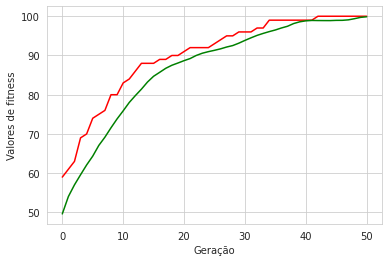

In [ ]:
# gráfico:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Geração')
plt.ylabel('Valores de fitness')
plt.show()